In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 6.3 MB 31.1 MB/s 
     |████████████████████████████████| 15.4 MB 24.7 MB/s 


In [ ]:
!pip install chart_studio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as geo
from shapely.geometry import Point,polygon

import plotly.graph_objs as go
from chart_studio import plotly as py
from plotly.offline import init_notebook_mode,iplot

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from pandas.plotting import scatter_matrix

### Data Collection

In [ ]:
#Import data
data= pd.read_csv('HousingPrices.csv')

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
#drop inappropriate Columns from dataFrame
dataset = data.drop(['id','date'], axis=1)
data=data.drop(['id','date'], axis=1)

In [ ]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Data Discription

In [ ]:
#Checking for total number of null values in all columns
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#Dataset information and their type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
#Dataset description(mean,max,min.., etc)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#Number of rows in Dataset
len(data)

21613

In [ ]:
#Number of Columns in dataset
len(data.columns)

19

### House locations on Map

Q. Latitude vs Longitude to see the map of where houses are located

#### House Location Over the basemap of Kings County

In [ ]:
#GeoPandas datafram for making longitude and latitude usable for map
gdf = geo.GeoDataFrame(dataset, geometry=geo.points_from_xy(dataset.lat, dataset.long))

##### Here I used Kings County Basemap and plot the Longitude and Latitude point(which got from Geopandas datafram) on that basemap. It helps to see the hoses locations.  I dounload the Shapefile of Kings County and deploy the plot over it. The shapefile I dounload from "Kings County GSI Open Data"
###### Basemap File link = "https://gis-kingcounty.opendata.arcgis.com/datasets/street-address-st-address-line/explore?location=47.724462%2C-121.939655%2C14.83"

In [ ]:
seattle = geo.read_file('Street_Address___st_address_line.shp')

In [ ]:
geometry = [Point(xy) for xy in zip(dataset['long'], dataset['lat'])]
gdf = geo.GeoDataFrame(dataset, geometry=geometry)

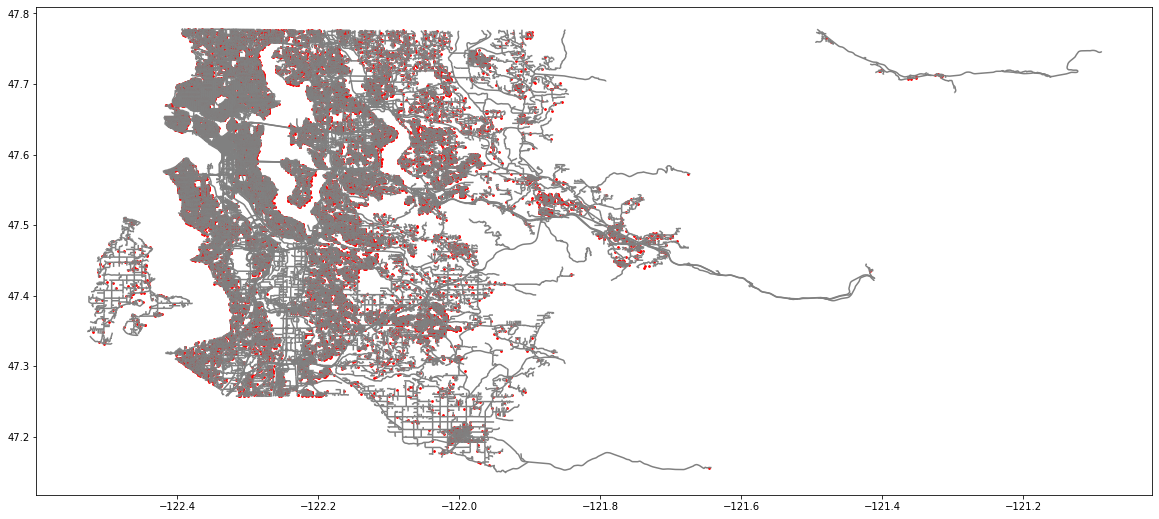

In [ ]:
gdf.plot(ax=seattle.plot(figsize=(20, 20), color = 'grey'), marker='o', color='red', markersize=3);

#### House location according to their Built time period

##### Here I plot a scatter graph between Latitude and Longitude with the time range when house were build. To show in which time period maximum houses were build

In [ ]:
dataset['yr_built'] = dataset.yr_built.map(lambda x: 1 if x >= 1900 and x <= 1940 else (2 if x > 1940 and x <= 1980 else 3))

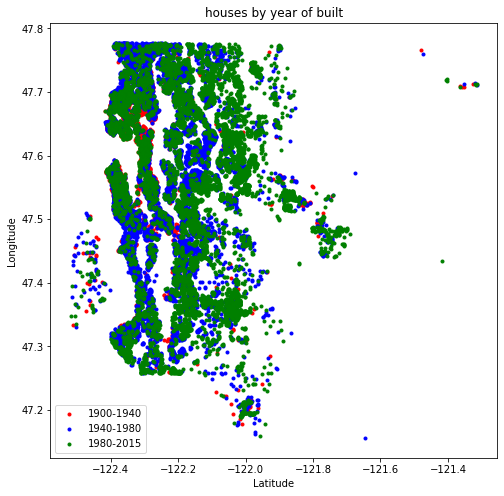

In [ ]:
lat1 = dataset.loc[dataset['yr_built'] == 1].lat
long1 = dataset.loc[dataset['yr_built'] == 1].long

lat2 = dataset.loc[dataset['yr_built'] == 2].lat
long2 = dataset.loc[dataset['yr_built'] == 2].long

lat3 = dataset.loc[dataset['yr_built'] == 3].lat
long3 = dataset.loc[dataset['yr_built'] == 3].long

all_houses = plt.figure(figsize=(8,8))

plt.scatter(long1, lat1, label = '1900-1940', color='red', marker='.')
plt.scatter(long2, lat2, label = '1940-1980', color='blue', marker='.')
plt.scatter(long3, lat3, label = '1980-2015', color='green', marker='.')

plt.title('houses by year of built')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

#### All the House Locations in the Map

##### Here I used mapbox. It is similar to Google maps, but it allow us to modify the map. To access that I used mapbox token. Also, here I used plotly library which give more wide range of graph types, also ploting a graph with plotly is more easy and fast then matplotlib library. By using both we are getting a more clear graph, in which we can see the city,area, street name where the house is located. The Token can be get by sign In the Mapbox account. 


In [ ]:
mapbox_access_token = 'pk.eyJ1IjoiZGFya2NvcmUiLCJhIjoiY2pscGFheHA1MXdqdjNwbmR3c290MTZ6dCJ9.K1FMv_q3ZVlKP13RrjFkjg'
locations = [go.Scattermapbox(lat=dataset['lat'],lon=dataset['long'],mode="markers",marker=dict(size=3,color='red'))]
basemap = dict(title="House Locations on MAP",width=700,height=700,hovermode="closest",mapbox=dict(zoom=10,center=dict(lat=47.5,lon=-122.161),accesstoken=mapbox_access_token))
house_location = go.Figure(data=locations,layout=basemap)
iplot(house_location)

#### Most Expensive House locations on Map

###### Here we used folium to display to 1% most expensive house according to dataset on map. Folium library give more detailed and color full graph. In the view it is similar to the goggle maps also, it shows the house locations by the drop point mark. It is good to show limited locations because it takes more graphical processing. 
###### I centerize the map on seattle location and give the cordinates of top 1% most expensive houses. Also, I added popup with marker which gives details about house price and area when we click on the mark.

In [ ]:
pricetop= dataset['price'].quantile(0.99)
expensive = dataset[(dataset['price'] >= pricetop)]

Here we can see mostly expensive house are located in the downtown of seattle city.

In [ ]:
map = folium.Map(location=[47.6062,-122.3321], tiles='openstreetmap', zoom_start=11)
# Add points to the map
for idx, row in expensive.iterrows():
    Marker([row['lat'], row['long']]).add_to(map)
    popup_text = "Price: {}, Sqft: {}".format(row['price'],row['sqft_living'])
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([row['lat'], row['long']], popup=popup).add_to(map)
# Display the map
map

### Data Visualization

#### Scatter Plot of Price with all Other Columns of dataset. I plot all the scatter in the single figure

###### Scatter grapph of all the features with the price in single figure

Q. Multiples Scatter plots of the price vs. different independent variables to get a feel of the data.

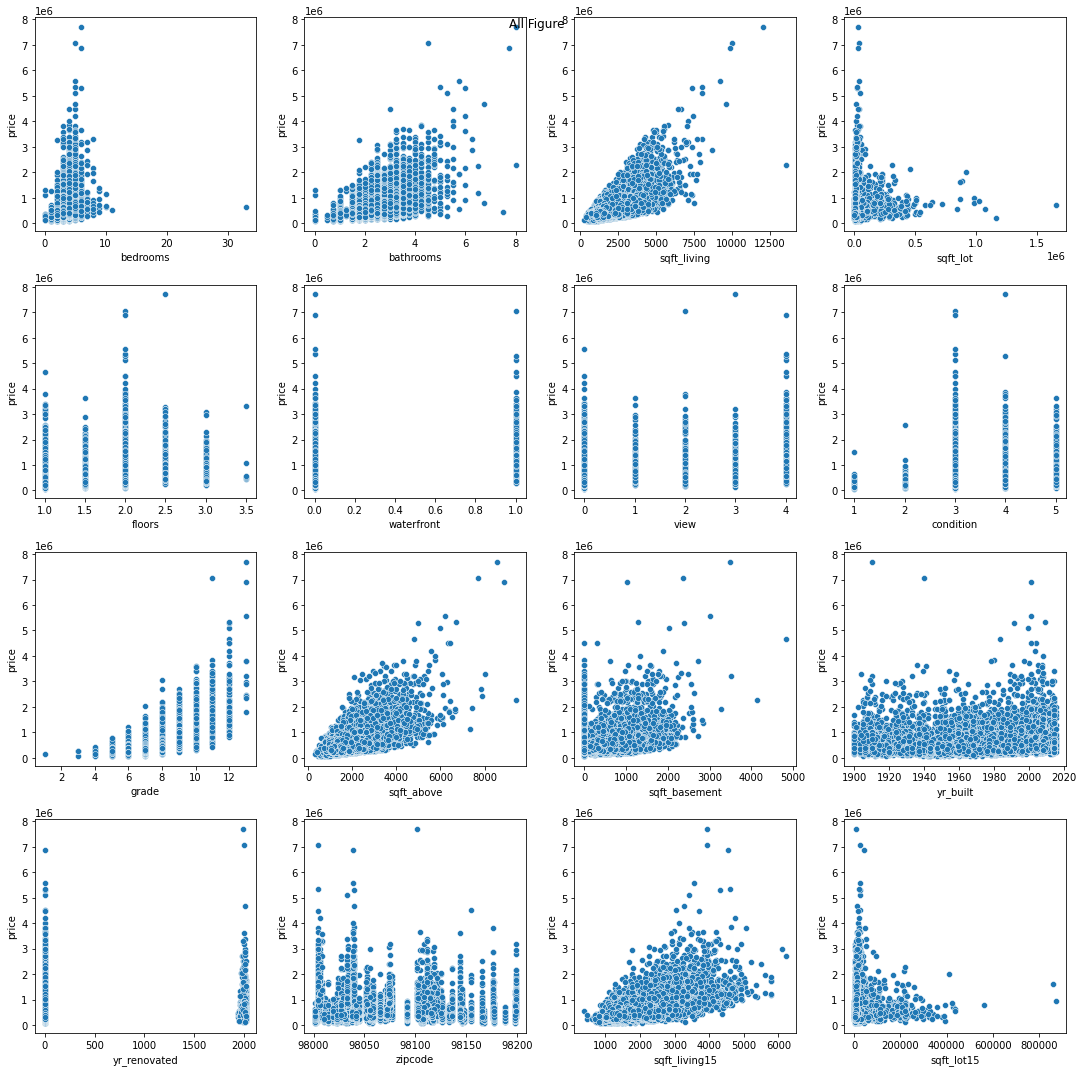

In [ ]:
fig,ax=plt.subplots(4,4,figsize=(15,15))
plt.suptitle('All Figure')
plt.subplot(4,4,1)
sns.scatterplot(x='bedrooms', y='price', data=data)
plt.subplot(4,4,2)
sns.scatterplot(x='bathrooms', y='price', data=data)
plt.subplot(4,4,3)
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.subplot(4,4,4)
sns.scatterplot(x='sqft_lot', y='price', data=data)
plt.subplot(4,4,5)
sns.scatterplot(x='floors', y='price', data=data)
plt.subplot(4,4,6)
sns.scatterplot(x='waterfront', y='price', data=data)
plt.subplot(4,4,7)
sns.scatterplot(x='view', y='price', data=data)
plt.subplot(4,4,8)
sns.scatterplot(x='condition', y='price', data=data)
plt.subplot(4,4,9)
sns.scatterplot(x='grade', y='price', data=data)
plt.subplot(4,4,10)
sns.scatterplot(x='sqft_above', y='price', data=data)
plt.subplot(4,4,11)
sns.scatterplot(x='sqft_basement', y='price', data=data)
plt.subplot(4,4,12)
sns.scatterplot(x='yr_built', y='price', data=data)
plt.subplot(4,4,13)
sns.scatterplot(x='yr_renovated', y='price', data=data)
plt.subplot(4,4,14)
sns.scatterplot(x='zipcode', y='price', data=data)
plt.subplot(4,4,15)
sns.scatterplot(x='sqft_living15', y='price', data=data)
plt.subplot(4,4,16)
sns.scatterplot(x='sqft_lot15', y='price', data=data)
fig.tight_layout()

In [ ]:
print(data.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


#### Scatter Matrix between Selected Features of Data

##### Scatter matrix plot between  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built'], to represent the relation with each other.

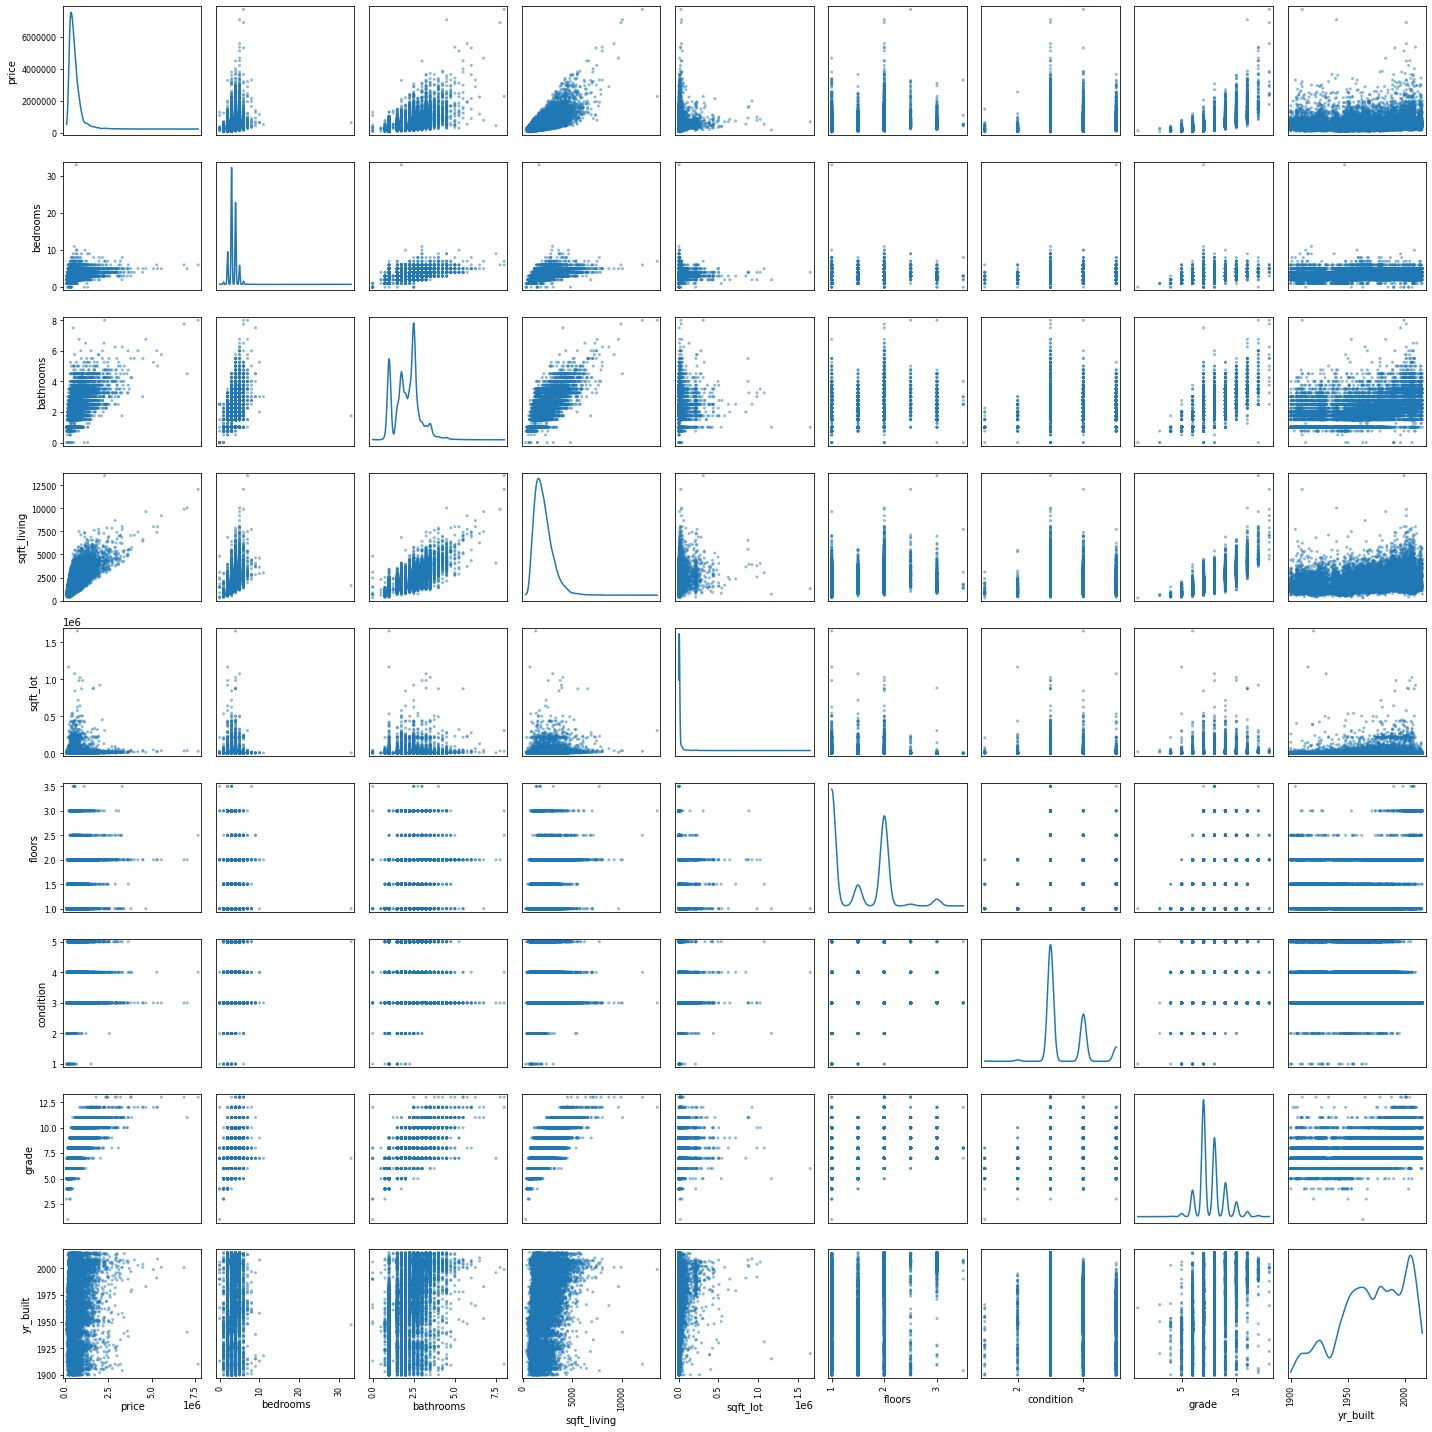

In [ ]:
# Here I representing the scatter matrix plot of selected columns of dataset
from pandas.plotting import scatter_matrix
column = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
scatter_matrix(data[column],alpha=0.5, figsize=(20, 20), diagonal='kde')
plt.tight_layout()
plt.show()

#### Data Visualization by different graph on different Features

Q. Add other visulization that you think are helpful to understand the data.


Pie chart to show which condition house have most in dataset

In [ ]:
y =data.groupby('condition').size()
y=y.to_frame()
y.reset_index(inplace=True)
y = y.rename(columns={0: "count"})

([<matplotlib.patches.Wedge at 0x7f9417946d50>,
 [Text(1.099989541385049, 0.004796753434368107, '1'),
  Text(1.0993745866014315, 0.03708798100370993, '2'),
  Text(-0.5536424087886221, 0.9505156932900858, '3'),
  Text(0.2730107059034186, -1.0655820730765497, '4'),
  Text(1.0665476229693713, -0.26921398169185823, '5')],
 [Text(0.5999942953009356, 0.0026164109642007856, '0.1%'),
  Text(0.5996588654189626, 0.020229807820205413, '0.8%'),
  Text(-0.30198676843015754, 0.5184631054309559, '64.9%'),
  Text(0.14891493049277377, -0.5812265853144816, '26.3%'),
  Text(0.5817532488923842, -0.14684399001374085, '7.9%')])

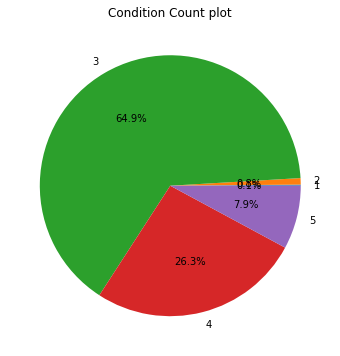

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
plt.title('Condition Count plot')
plt.pie(y['count'], autopct='%1.1f%%',labels=y['condition'])

Count Plot of bedrooms, bathrooms,condition,grade, floors and view in single figure.

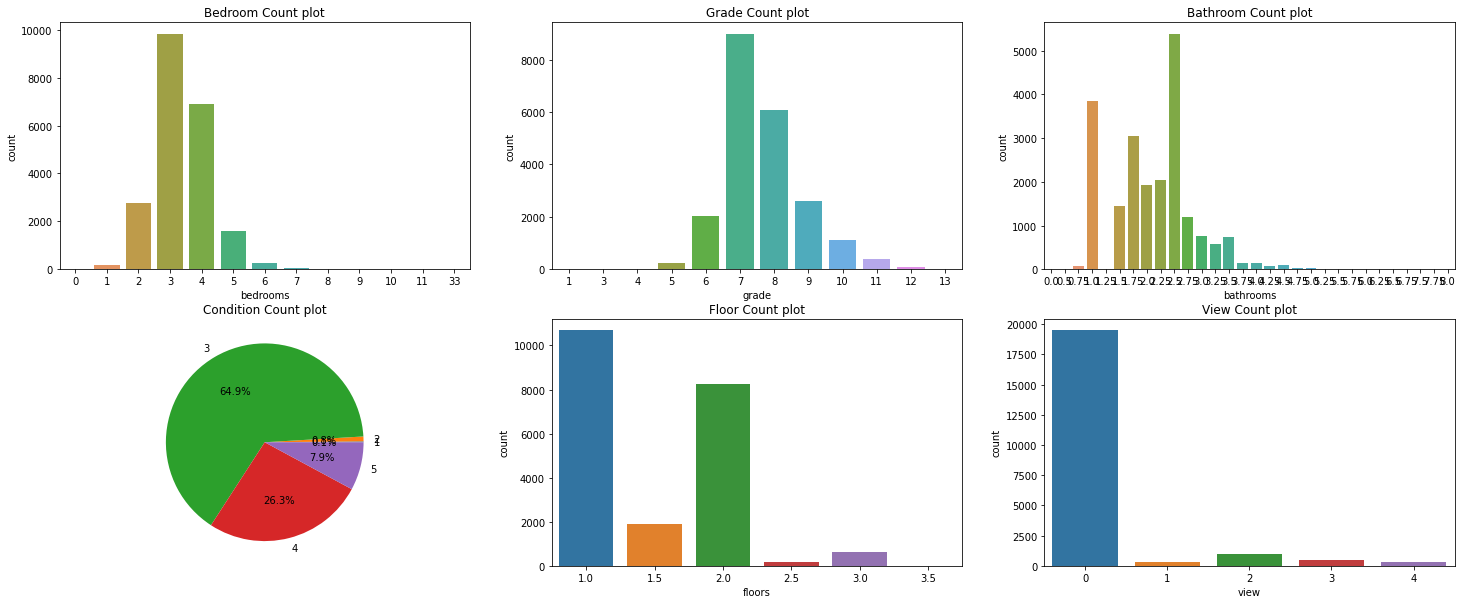

In [ ]:
# Count of grade columns. It shows mostly houses are 7 and 8 graded
fig,ax=plt.subplots(2,3,figsize=(25,10))
plt.subplot(2,3,1)
plt.title('Bedroom Count plot')
sns.countplot(x='bedrooms', data=data)
plt.subplot(2,3,2)
plt.title('Grade Count plot')
sns.countplot(x='grade', data=data)
plt.subplot(2,3,3)
plt.title('Bathroom Count plot')
sns.countplot(x='bathrooms', data=data)
plt.subplot(2,3,4)
plt.title('Condition Count plot')
plt.pie(y['count'], autopct='%1.1f%%',labels=y['condition'])
plt.subplot(2,3,5)
plt.title('Floor Count plot')
sns.countplot(x='floors', data=data)
plt.subplot(2,3,6)
plt.title('View Count plot')
sns.countplot(x='view', data=data)

Distribution plot of Built year of house. It shows in which year most house were build

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



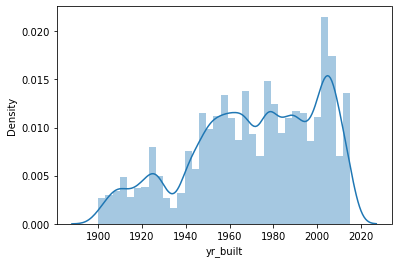

In [ ]:
sns.distplot(data['yr_built'])

Distribution Plot of size of living area, It shows maximum houses area is between 800 to 4000 squre feet.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



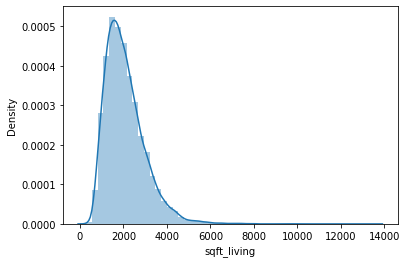

In [ ]:
sns.distplot(data['sqft_living'])

Till 5 badrooms house the price is increaing in linear form, but after that it remain steady upto 7 badrooms hous and rapidly increase on 8 badrooms house. After that it decrease gradually.

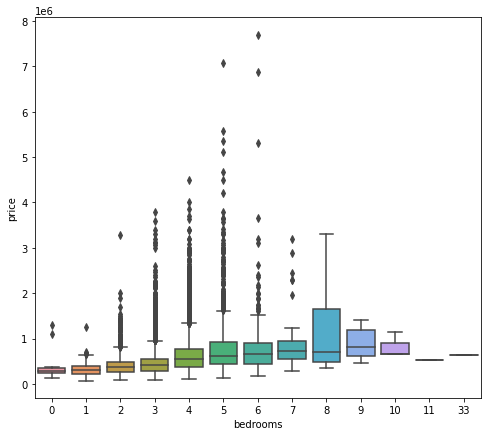

In [ ]:
#Box plot between price and No. of bedrooms. It helps to show the outliers and effect of no. bedrooms on the house price
fig,ax=plt.subplots(figsize=(8,7))
sns.boxplot(x='bedrooms', y='price', data = data)

As house grade is increasing, the house price is also increase. according to box plot. Means they are highly corelated

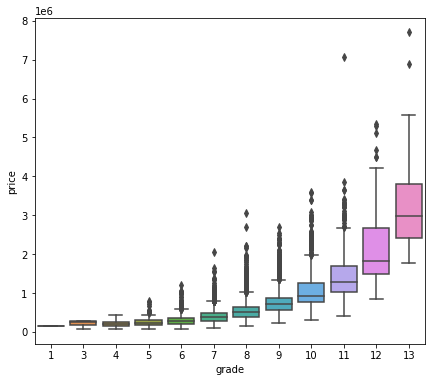

In [ ]:
# Box plot between Price and Grade to show the relation.
fig,ax=plt.subplots(figsize=(7,6))
sns.boxplot(x='grade', y='price', data = data)

#### Build and Renovation year graph with Price

###### Here I am replacing the '0' of renovat year with that house build year. As if house does not renoveted then it's condition would be remain same. By that we can see that does renovation effect house price. Also, I removed outliers which effect our data for that I used quantile to get 2-98% data.

In [ ]:
da = data[['price','yr_built','yr_renovated']]

In [ ]:
da['yr_renovated'] = np.where(da['yr_renovated'] == 0, da['yr_built'], da['yr_renovated'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Setting quantile on the price column
npr= da['price'].quantile(0.98)
npr2 = da['price'].quantile(0.02)

In [ ]:
#Appling quantile on the dataset
da1 = da.drop(['yr_built'], axis = 1)
da1 = da1[(da1['price'] <= npr) & (da1['price'] >= npr2)]

In [ ]:
da2 = da.drop(['yr_renovated'], axis = 1)
da2 = da2[(da2['price'] <= npr) & (da2['price'] >= npr2)]

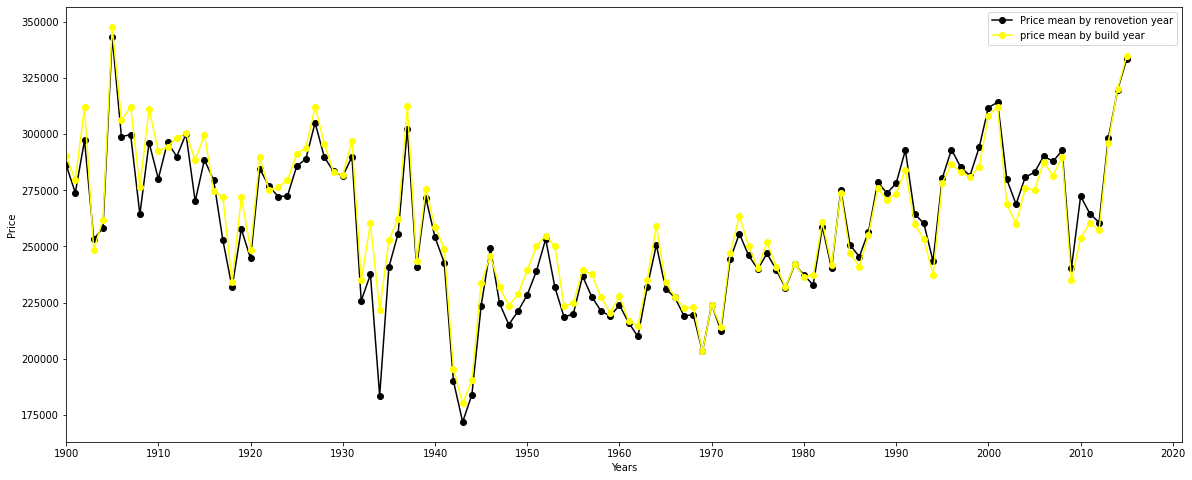

In [ ]:
#plot of renovated and build year with price to show the difference
f, ax = plt.subplots(1, figsize=(20,8))
axes = plt.gca()
axes.set_xlim([1900,2021])
plt.xticks(np.arange(1900, 2021, 10.0))
ax.plot(da1.groupby([da1.yr_renovated]).apply(np.nanmean),'black',marker='o', label='Price mean by renovetion year')
ax.plot(da2.groupby([da2.yr_built]).apply(np.nanmean),'yellow', marker='o',label='price mean by build year')
plt.xlabel('Years')
plt.ylabel('Price')
ax.legend()

In the above graph we can see that many house older then 1950, their mean price according to renovation year is less then thier mean price according to built year. Because on that time house were not renoveted. Also, After 1950 many house value is increased after renovation then build price. It shows that because of renovation many old house price increased. 

## Correlation Matrix

##### Here I am making a correlation matrix to show the correlation between all the features

In [ ]:
correlation = data.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


###### Correlation metrix plot by heatmap to get more clear understanding of the correlation between columns. Here 1 show fully corelated and 0 show not correlated

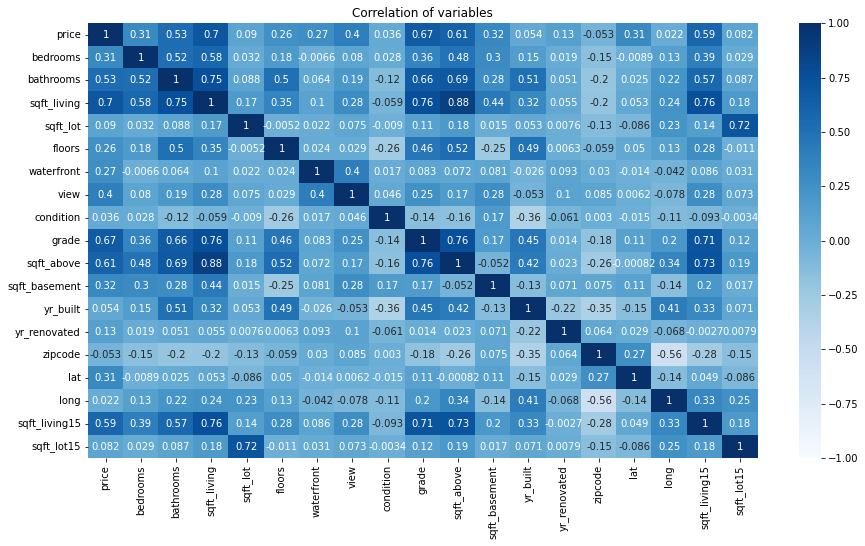

In [ ]:
# Using Seaborn to plot heatmap of correlation
fig,ax=plt.subplots(figsize=(15,8))
plt.title('Correlation of variables')
sns.heatmap(data.corr(), vmin=-1,vmax= 1, cmap="Blues", annot=True)

## Data Prediction

Q. Modeling which will achieve your intended goal by using the data.

In [ ]:
#Assining data to new variable
df = data

##### Taking out the outliers, took 96% window as valid data and 4%  outlier on both maximum and minimum

In [ ]:
npr= df['price'].quantile(0.98)
npr2 = df['price'].quantile(0.02)
df = df[(df['price'] <= npr) & (df['price'] >= npr2)]

##### Taking Price as Target Variable and Others columns as Features. And assinging them to x and y variable 


In [ ]:
# spliting data into features and target variable
x = df.iloc[: , 1:].values
y = df.iloc[: , 0].values

### OLS regression model

For OLS regression we have to add constant with the features data. It make the mean 0 of biased data which helps to get y-intercept point.

In [ ]:
# adding constant to select manage baised data and get Y-intercept 
from statsmodels.api import add_constant
X=add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Applying OLS on the feature and Target varible and giving the summary of model. That summary is giving accuracy, F-value, coefficent,Standard error, P-value, probability, t-value and confidance interval.

In [ ]:

from statsmodels.api import OLS
model1=OLS(y,X)
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2902.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:56:29   Log-Likelihood:            -2.7557e+05
No. Observations:               20785   AIC:                         5.512e+05
Df Residuals:                   20767   BIC:                         5.513e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.506e+06   2.08e+06     -1.684      0.092   -7.59e+06    5.75e+05
x1         -1.383e+04   1347.576    -10.266      0.000   -1.65e+04   -1.12e+04
x2          2.749e+04   2315.594     11.873      0.000     2.3e+04     3.2e+04
x3            59.0545      1.683     35.087      0.000      55.755      62.353
x4             0.1795      0.034      5.242      0.000       0.112       0.247
x5          3.123e+04   2547.468     12.258      0.000    2.62e+04    3.62e+04
x6          1.905e+05   1.56e+04     12.230      0.000     1.6e+05    2.21e+05
x7            4.1e+04   1546.492     26.512      0.000     3.8e+04     4.4e+04
x8          2.708e+04   1667.456     16.242      0.000    2.38e+04    3.04e+04
x9          8.768e+04   1539.095     56.971      0.000    8.47e+04    9.07e+04
x10           30.5637      1.653     18.491      0.000      27.324      33.803
x11           28.4876      1.907     14.938      0.000      24.750      32.226
x12        -2140.0499     51.603    -41.472      0.000   -2241.195   -2038.904
x13           19.2423      2.629      7.319      0.000      14.089      24.395
x14         -332.8731     23.485    -14.174      0.000    -378.905    -286.841
x15         5.669e+05   7523.070     75.349      0.000    5.52e+05    5.82e+05
x16        -1.049e+05   9327.527    -11.242      0.000   -1.23e+05   -8.66e+04
x17           48.2581      2.523     19.129      0.000      43.313      53.203
x18           -0.1537      0.051     -2.994      0.003      -0.254      -0.053
==============================================================================
Omnibus:                     4472.583   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16319.990
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       6.798   Cond. No.                     3.72e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Here we are calculating the accuracy by R2 value

In [ ]:
OlS_Accuracy = result1.rsquared
print("OLS regression model Accuracy =  ", OlS_Accuracy)

OLS regression model Accuracy =   0.7037291456830179


### Linear Regression Model

For Model validation we split the data into train data and test data. We will train the model on train data and check it's accuracy on test data.

In [ ]:
# Spliting Feature and target variable into training and testing with 80/20 ration.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
#Appling Liner regression model on training data. to train the model.
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Predicting test data by linear regression
y_pred= lr.predict(x_test)
y_pred

array([401242.24194059, 648281.34453297, 216896.40105045, ...,
       493497.84945475, 516225.2064312 , 418853.04870843])

Checking the model accuracy by compairing predicted value and actual value. Here I used sklearn metrics R2 value to get the model accuracy. 

In [ ]:
import sklearn.metrics as sm
Linear_Accuracy=sm.r2_score(y_test,y_pred)
print("Linear regression model Accuracy = ", Linear_Accuracy)

Linear regression model Accuracy =  0.6960990919319794


### Decision Tree Regressor

Here I am using another regressor, The DecisionTree Regressor. As it support both linear and non-linear data. It fits to data more accuratly.

In [ ]:
from sklearn.tree import DecisionTreeRegressor   
# create a regressor object of decision tree regreesor 
# fit the regressor on train data
Dregrassor = DecisionTreeRegressor(random_state = 42)
Dregrassor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#predicting test data
pred = Dregrassor.predict((x_test))

Checking accuracy by R2 value of the model

In [ ]:
# Accuracy of Decision tree model
DecisionTree_Accuracy=sm.r2_score(y_test,pred)
print("DecisionTree regression model Accuracy = ", DecisionTree_Accuracy)

DecisionTree regression model Accuracy =  0.7208157277712415


### Random Forest Regression

As DecisionTree is based on the single tree concept, which is not much efficient for predicting large data with multiple features. 
So, to make more accurate prediction I used Random Forest Regressor. This model works on multiple decision tree concept and  use analyse all tree before making any decision(Predition). That's why it gives more accuracy.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RDregressor = RandomForestRegressor(n_estimators = 200, random_state = 1)
RDregressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=1)

In [ ]:
#Applying Random forest regressor on test data to predict
Rd_pred = RDregressor.predict(x_test)

In [ ]:
#Checking the accuracy of model 
RandomForest_Accuracy=sm.r2_score(y_test,Rd_pred)
print("RandomForest regression model Accuracy = ", RandomForest_Accuracy)

RandomForest regression model Accuracy =  0.8682636767525603


### ALL Regression Accuracy DataFrame

I combine all the model and their Accuracy in single dataframe to get good understanding of the models.

In [ ]:
Prediction_Accuracy = pd.DataFrame({
    'Model': ['OLS Regression','Linear Regression','Decision Tree','Random Forest'],
    'Score': [OlS_Accuracy,Linear_Accuracy,DecisionTree_Accuracy,RandomForest_Accuracy],
    'Precentage %': [(OlS_Accuracy*100),(Linear_Accuracy*100),(DecisionTree_Accuracy*100),(RandomForest_Accuracy*100)]})
Prediction_Accuracy

,Model,Score,Precentage %
0,OLS Regression,0.703729,70.372915
1,Linear Regression,0.696099,69.609909
2,Decision Tree,0.720816,72.081573
3,Random Forest,0.868264,86.826368


In above Table, we can see Linear Regression is giving minimum Accuracy then others that is 69%, which shows that data is linear but not fully.

Whereas Random Forest is giving Highest Accuracy that is 86.82%, because it is using multiple tree to predict the price. 